In [2]:
"""
bernoulli trial

결과가 성공(Success) 혹은 실패(Fail) 두 가지 중 
하나로만 나오는 것을 베르누이 시도(Bernoulli trial)라고 한다. 
예를 들어 동전을 한 번 던져 앞면(H:Head)이 나오거나 
뒷면(T:Tail)이 나오게 하는 것은 베르누이 시도의 일종이다.

확률 : p
E(X) : p, V(X) : p(1-p)


"""

In [ ]:
"""
scipy를 사용한 베르누이 분포의 시뮬레이션
Scipy의 stats 서브 패키지에 있는 bernoulli 클래스가 
베르누이 확률 분포를 위한 클래스다. p 인수로 분포의 모수 θ을 설정한다.

다음 예에서는 p = 0.6 으로 설정하였다.
"""

In [112]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from matplotlib import font_manager, rc
font_name= font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [64]:
prob = 0.6
rv = stats.bernoulli(prob)

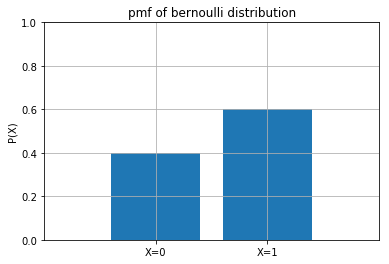

In [54]:
# pmf : probability mass function (확률 질량 함수)
x = [0, 1]
plt.bar(x, rv.pmf(x))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["X=0", "X=1"])
plt.ylabel("P(X)")
plt.grid()
plt.title("pmf of bernoulli distribution")
plt.show()

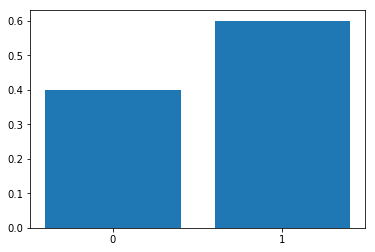

In [66]:
# 시뮬레이션 rvs 사용
# 성공확률이 0.6인 시도를 1000번 했을때 성공 확률
x = rv.rvs(1000, random_state=0)
# plt.bar 사용
y = rv.pmf(x)
plt.bar(x, y)
plt.xticks([0, 1])
plt.show()

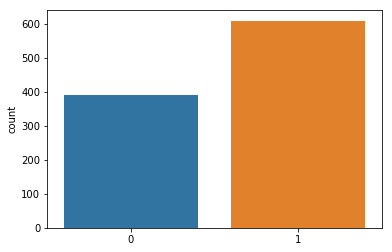

In [35]:
# seaborn countplot
sns.countplot(x)
plt.show()

In [43]:
np.unique(x, return_counts=True)
# 성공 390, 실패 610

(array([0, 1]), array([390, 610], dtype=int64))

In [83]:
# E(X) : p, V(X) : p(1-p)
p = 0.6
print(p * (1 - p))
print(x.mean())
print(x.var(ddof=1))
# 비슷하게 나온다. 시도를 더 많이 하면 거의 정확하게 수렴.

0.24
0.61
0.238138138138


In [84]:
# scipy.describe()
stats.describe(x)

DescribeResult(nobs=1000, minmax=(0, 1), mean=0.60999999999999999, variance=0.23813813813813811, skewness=-0.4510508024576014, kurtosis=-1.7965531736023537)

In [85]:
s = pd.Series(x)
s.describe()

count    1000.000000
mean        0.610000
std         0.487994
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

In [78]:
# 이론적인 분포와 샘플의 확률 분포 비교
y = np.bincount(x, minlength=2) / len(x)
theo = [0, 1]
df = pd.DataFrame({"theoretic": rv.pmf(theo), "simulation": y})
df.index = ["failure", "success"]
df

,simulation,theoretic
failure,0.39,0.4
success,0.61,0.6


In [80]:
df2 = df.stack().reset_index()
df2.columns = ["success or failure", "type", "ratio"]
df2

,success or failure,type,ratio
0,failure,simulation,0.39
1,failure,theoretic,0.40
2,success,simulation,0.61
3,success,theoretic,0.60


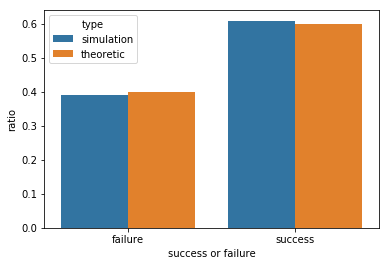

In [82]:
# seaborn barplot
sns.barplot(x="success or failure", y="ratio", hue="type", data=df2)
plt.show()

In [ ]:
"""
연습 문제 2

베르누이 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 
기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 
비교한 카운트 플롯을 그린다. 
샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

θ=0.5 
"""

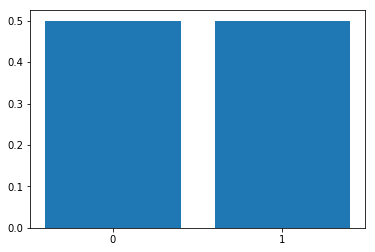

In [93]:
# p = 0.5
p = 0.5
rv = stats.bernoulli(p)
data = rv.rvs(10)
plt.bar(data, rv.pmf(data))
plt.xticks([0, 1])
plt.show()

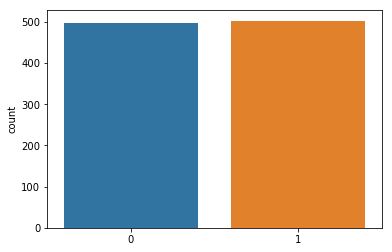

In [96]:
data = rv.rvs(1000)
sns.countplot(data)
plt.show()

In [102]:
x = [0, 1]
y = np.bincount(data, minlength=2)/len(data)
df = pd.DataFrame(
    {
        "이론": rv.pmf(x),
        "샘플": y
    }
)
df.index = ["실패", "성공"]
df

,샘플,이론
실패,0.497,0.5
성공,0.503,0.5


In [109]:
df2 = df.stack().reset_index()
df2.columns = ["여부", "공식", "확률"]
df2

,여부,공식,확률
0,실패,샘플,0.497
1,실패,이론,0.500
2,성공,샘플,0.503
3,성공,이론,0.500


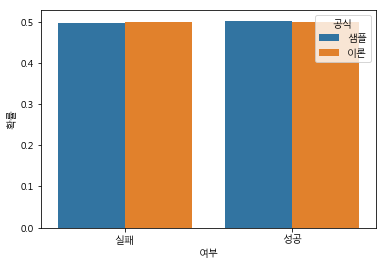

In [136]:

sns.barplot(x="여부", y="확률", hue="공식", data=df2)
plt.show()